In [1]:
from keras.models import Sequential    # Importing Libraries
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import pandas as pd

In [2]:
fores_data = pd.read_csv('forestfires.csv')  # Loading Dataset
fores_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
fores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
fores_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaler = StandardScaler()

In [6]:
fores_data['month'] = le.fit_transform(fores_data['month'])
fores_data['day'] = le.fit_transform(fores_data['day'])
fores_data['size_category'] = le.fit_transform(fores_data['size_category'])

In [7]:
X= fores_data.drop('size_category',axis=1)
Y=fores_data['size_category']

In [8]:
X_scaled = scaler.fit_transform(X)

In [9]:
#Neural Network Model
model = Sequential()
model.add(Dense(12,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss ='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, validation_split = 0.33,epochs = 150, batch_size = 10)

Epoch 1/150
35/35 [==============================] - 1s 5ms/step - loss: 0.6444 - accuracy: 0.7197 - val_loss: 0.6342 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7572 - val_loss: 0.6096 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7601 - val_loss: 0.6511 - val_accuracy: 0.6842
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7659 - val_loss: 0.5604 - val_accuracy: 0.7018
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7977 - val_loss: 0.5282 - val_accuracy: 0.7368
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8064 - val_loss: 0.4300 - val_accuracy: 0.8012
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8555 - val_loss: 0.3827 - val_accuracy: 0.8129
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9971 - val_loss: 0.0720 - val_accuracy: 0.9825
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9942 - val_loss: 0.0708 - val_accuracy: 0.9649
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9913 - val_loss: 0.0666 - val_accuracy: 0.9766
Epoch 62/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.1017 - val_accuracy: 0.9474
Epoch 63/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9884 - val_loss: 0.2009 - val_accuracy: 0.9240
Epoch 64/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9798 - val_loss: 0.0685 - val_accuracy: 0.9708
Epoch 65/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9913 - val_loss: 0.1190 - val_accuracy: 0.9591
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9913 - val_loss: 0.0970 - val_accuracy: 0.9532
Epoch 117/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0849 - val_accuracy: 0.9766
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9942 - val_loss: 0.1128 - val_accuracy: 0.9415
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9971 - val_loss: 0.0918 - val_accuracy: 0.9708
Epoch 120/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9913 - val_loss: 0.0858 - val_accuracy: 0.9708
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9913 - val_loss: 0.1075 - val_accuracy: 0.9532
Epoch 122/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9827 - val_loss: 0.2196 - val_accuracy: 0.9240
Epoch 123/150

In [10]:
score = model.evaluate(X,Y)

17/17 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9903


In [11]:
model.metrics_names[1], score[1]*100

('accuracy', 99.0328848361969)

In [12]:
h = model.fit(x = X, y = Y, verbose = 1,batch_size = 50,epochs = 500,shuffle = 'true')

Epoch 1/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9845
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9845
Epoch 3/500
11/11 [==============================] - 0s 936us/step - loss: 0.0361 - accuracy: 0.9903
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9865
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 0.9923
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9884
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9884
Epoch 8/500
11/11 [==============================] - 0s 966us/step - loss: 0.0302 - accuracy: 0.9923
Epoch 9/500
11/11 [==============================] - 0s 753us/step - loss: 0.0333 - accuracy: 0.9903
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9903
Epo

11/11 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9903
Epoch 83/500
11/11 [==============================] - 0s 344us/step - loss: 0.0239 - accuracy: 0.9923
Epoch 84/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9903
Epoch 85/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9923
Epoch 86/500
11/11 [==============================] - 0s 634us/step - loss: 0.0166 - accuracy: 0.9923
Epoch 87/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9923
Epoch 88/500
11/11 [==============================] - 0s 626us/step - loss: 0.0165 - accuracy: 0.9942
Epoch 89/500
11/11 [==============================] - 0s 424us/step - loss: 0.0162 - accuracy: 0.9942
Epoch 90/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9923
Epoch 91/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9942
Epoch

11/11 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9691
Epoch 163/500
11/11 [==============================] - 0s 446us/step - loss: 0.1107 - accuracy: 0.9787
Epoch 164/500
11/11 [==============================] - 0s 501us/step - loss: 0.0785 - accuracy: 0.9807
Epoch 165/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9865
Epoch 166/500
11/11 [==============================] - 0s 605us/step - loss: 0.0338 - accuracy: 0.9845
Epoch 167/500
11/11 [==============================] - 0s 317us/step - loss: 0.0322 - accuracy: 0.9884
Epoch 168/500
11/11 [==============================] - 0s 717us/step - loss: 0.0106 - accuracy: 0.9981
Epoch 169/500
11/11 [==============================] - 0s 695us/step - loss: 0.0117 - accuracy: 0.9961
Epoch 170/500
11/11 [==============================] - 0s 367us/step - loss: 0.0120 - accuracy: 0.9961
Epoch 171/500
11/11 [==============================] - 0s 782us/step - loss: 0.0115 - accur

11/11 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9884
Epoch 243/500
11/11 [==============================] - 0s 987us/step - loss: 0.0525 - accuracy: 0.9729
Epoch 244/500
11/11 [==============================] - 0s 709us/step - loss: 0.0530 - accuracy: 0.9807
Epoch 245/500
11/11 [==============================] - 0s 518us/step - loss: 0.0260 - accuracy: 0.9845
Epoch 246/500
11/11 [==============================] - 0s 750us/step - loss: 0.0093 - accuracy: 0.9981
Epoch 247/500
11/11 [==============================] - 0s 230us/step - loss: 0.0097 - accuracy: 0.9942
Epoch 248/500
11/11 [==============================] - 0s 524us/step - loss: 0.0127 - accuracy: 0.9961
Epoch 249/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9942
Epoch 250/500
11/11 [==============================] - 0s 413us/step - loss: 0.0107 - accuracy: 0.9961
Epoch 251/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0083 - accurac

11/11 [==============================] - 0s 396us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 323/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 324/500
11/11 [==============================] - 0s 605us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 325/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9981
Epoch 326/500
11/11 [==============================] - 0s 853us/step - loss: 0.0077 - accuracy: 0.9961
Epoch 327/500
11/11 [==============================] - 0s 389us/step - loss: 0.0055 - accuracy: 0.9981
Epoch 328/500
11/11 [==============================] - 0s 336us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 329/500
11/11 [==============================] - 0s 584us/step - loss: 0.0066 - accuracy: 0.9961
Epoch 330/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 331/500
11/11 [==============================] - 0s 925us/step - loss: 0.0114 - accurac

11/11 [==============================] - 0s 773us/step - loss: 0.0338 - accuracy: 0.9865
Epoch 403/500
11/11 [==============================] - 0s 874us/step - loss: 0.0402 - accuracy: 0.9865
Epoch 404/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.9961
Epoch 405/500
11/11 [==============================] - 0s 741us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 406/500
11/11 [==============================] - 0s 867us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 407/500
11/11 [==============================] - 0s 805us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 408/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 409/500
11/11 [==============================] - 0s 543us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 410/500
11/11 [==============================] - 0s 202us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 411/500
11/11 [==============================] - 0s 662us/step - loss: 0.0057 - accur

11/11 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9865
Epoch 483/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9865
Epoch 484/500
11/11 [==============================] - 0s 934us/step - loss: 0.0488 - accuracy: 0.9807
Epoch 485/500
11/11 [==============================] - 0s 259us/step - loss: 0.0631 - accuracy: 0.9845
Epoch 486/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9884
Epoch 487/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9903
Epoch 488/500
11/11 [==============================] - 0s 257us/step - loss: 0.0410 - accuracy: 0.9865
Epoch 489/500
11/11 [==============================] - 0s 819us/step - loss: 0.0146 - accuracy: 0.9903
Epoch 490/500
11/11 [==============================] - 0s 383us/step - loss: 0.0084 - accuracy: 0.9981
Epoch 491/500
11/11 [==============================] - 0s 227us/step - loss: 0.0041 - accuracy:

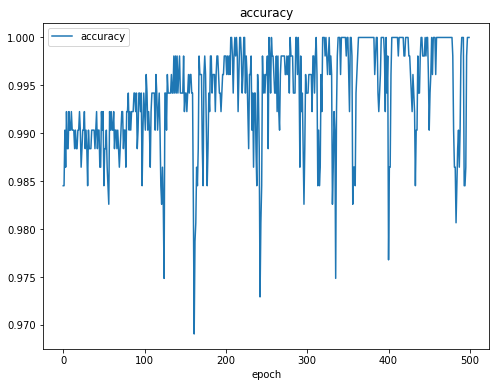

In [13]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy']);

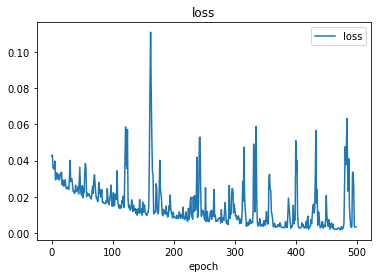

In [14]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss']);